This notebook is based on the tutorial Build a Deep CNN Image Classifier with ANY Images, https://www.youtube.com/watch?v=jztwpsIzEGc&ab_channel=NicholasRenotte.

In [ ]:
# INSTALL DEPENDENCIES
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 3.4 MB/s eta 0:00:00


In [ ]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh                         2.3.3
branca

In [ ]:
# IMPORTS
import tensorflow as tf
import os
import imghdr
import matplotlib.pyplot as plt
import cv2

In [ ]:
# TEST OS
DATA_DIR = os.path.join("drive", "MyDrive", "Colab Notebooks", "Happy Sad Image Classifier","data")

In [ ]:
# CONSTANTS
IMG_EXT = ["jpeg", "jpg", "bmp", "png"]
print(os.listdir(DATA_DIR))
print(IMG_EXT)

['sad', 'happy']
['jpeg', 'jpg', 'bmp', 'png']


In [ ]:
# REMOVE DODGY IMAGES
for img_class in os.listdir(DATA_DIR):
  for img in os.listdir(os.path.join(DATA_DIR, img_class)):
    img_path = os.path.join(DATA_DIR, img_class, img)
    ext = imghdr.what(img_path)
    if ext not in IMG_EXT:
      try:
        print(img, " not a jpeg, jpg, bmp or png")
        os.remove(img_path)
      except Exception as e:
        print(e)

people-luxury-fashion-emotions-concept-260nw-555081850.jpg  not a jpeg, jpg, bmp or png
portrait-sad-man-260nw-126009806.jpg  not a jpeg, jpg, bmp or png
sad-little-girl-pigtails-portrait-260nw-1269412360.jpg  not a jpeg, jpg, bmp or png
portrait-pimply-teenage-girl-blue-260nw-1027537180.jpg  not a jpeg, jpg, bmp or png
33854450352_4649a684d2_b.jpg  not a jpeg, jpg, bmp or png
happy-girl-shows-gesture-cool-260nw-116734885.jpg  not a jpeg, jpg, bmp or png
closeup-portrait-happy-mature-man-260nw-287228201.jpg  not a jpeg, jpg, bmp or png
human-face-expressions-emotions-young-260nw-442881877.jpg  not a jpeg, jpg, bmp or png
portrait-cute-little-smiling-girl-260nw-1248974617.jpg  not a jpeg, jpg, bmp or png
happy-girl-shows-gesture-cool-260nw-116734885 (1).jpg  not a jpeg, jpg, bmp or png


In [ ]:
print(len(os.listdir(os.path.join(DATA_DIR, "happy"))))
print(len(os.listdir(os.path.join(DATA_DIR, "sad"))))

183
200


In [ ]:
# CHECK THE IMAGES
img_read = cv2.imread(os.path.join(DATA_DIR, "sad", os.listdir(os.path.join(DATA_DIR, "sad"))[0]))
img_read

array([[[115, 109,  72],
        [115, 109,  72],
        [115, 109,  72],
        ...,
        [132, 119,  87],
        [132, 119,  87],
        [132, 119,  87]],

       [[115, 109,  72],
        [115, 109,  72],
        [115, 109,  72],
        ...,
        [130, 117,  85],
        [130, 117,  85],
        [130, 117,  85]],

       [[115, 109,  72],
        [115, 109,  72],
        [115, 109,  72],
        ...,
        [130, 117,  85],
        [130, 117,  85],
        [130, 117,  85]],

       ...,

       [[ 19,  19,   7],
        [ 20,  20,   8],
        [ 23,  21,  10],
        ...,
        [ 14,  11,   6],
        [ 14,  11,   6],
        [ 14,  11,   6]],

       [[ 17,  17,   5],
        [ 19,  19,   7],
        [ 22,  20,   9],
        ...,
        [ 14,  11,   6],
        [ 14,  11,   6],
        [ 14,  11,   6]],

       [[ 16,  16,   4],
        [ 18,  18,   6],
        [ 20,  18,   7],
        ...,
        [ 14,  11,   6],
        [ 14,  11,   6],
        [ 14,  11,   6]]

In [ ]:
img_read.shape

(500, 500, 3)

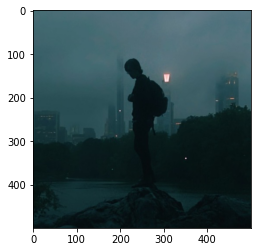

In [ ]:
plt.imshow(cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB))

In [ ]:
tf.data.Dataset??

In [ ]:
# IMPORTS
import numpy as np

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
# CREATE PIPELINE FOR THE DATA
# THE PIPELINE WILL BREAK INTO BATCHES OF DEFAULT 32 AND RESIZE TO DEFAULT 256X256 
data = tf.keras.utils.image_dataset_from_directory(DATA_DIR)

Found 383 files belonging to 2 classes.


In [ ]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# PIPELINE NEEDS ITERATOR
data_iterator = data.as_numpy_iterator()
data_iterator

In [ ]:
# ITERATOR FETCHES BATCH THROUGH .NEXT()
data_batch = data_iterator.next()

In [ ]:
print(data_batch[0].shape)
print(data_batch[1].shape)

(32, 256, 256, 3)
(32,)


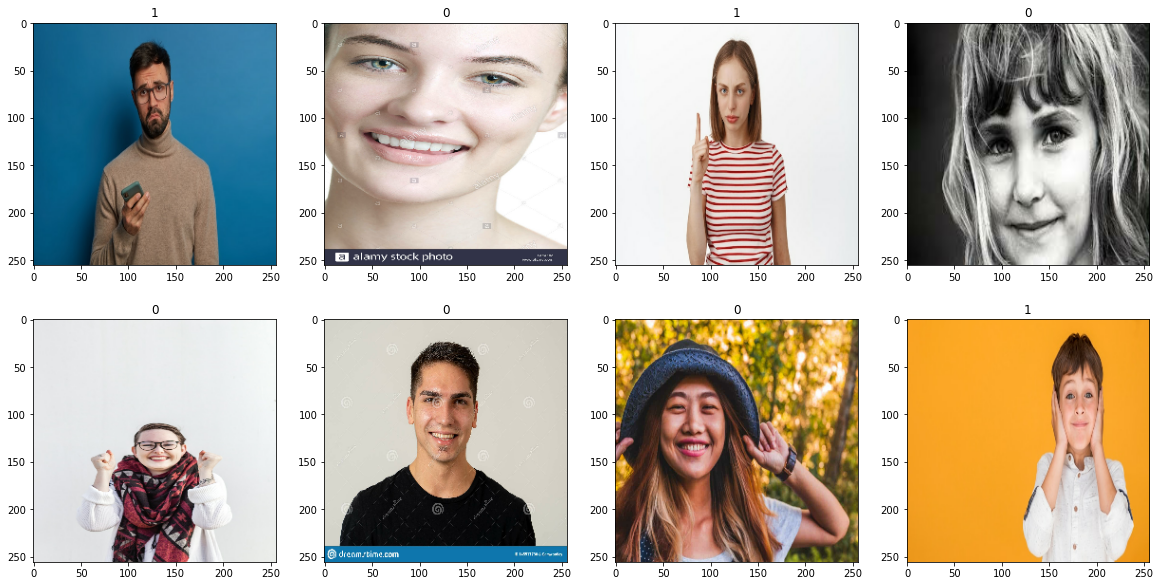

In [ ]:
# FIGURE OUT WHICH CLASS IS WHICH
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
indx = 0
for i in range(0, 2):
  for j in range(0, 4):
    img = data_batch[0][indx]
    ax[i][j].imshow(img.astype(int))
    ax[i][j].title.set_text(data_batch[1][indx])
    indx+=1
  # 1 - SAD
  # 0 - HAPPY

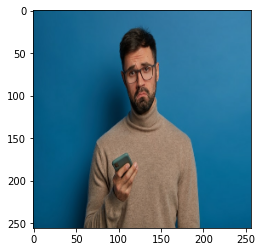

In [ ]:
scaled_batch = data_batch[0]/255
plt.imshow(scaled_batch[0])

In [ ]:
# SCALE USING THE MAP FUNCTION
scaled_data = data.map(lambda x, y: (x/255, y))
# ITERATOR
scaled_data_iterator = scaled_data.as_numpy_iterator()
# BATCH
scaled_batch = scaled_data_iterator.next() 

In [ ]:
scaled_batch[0].max()

1.0

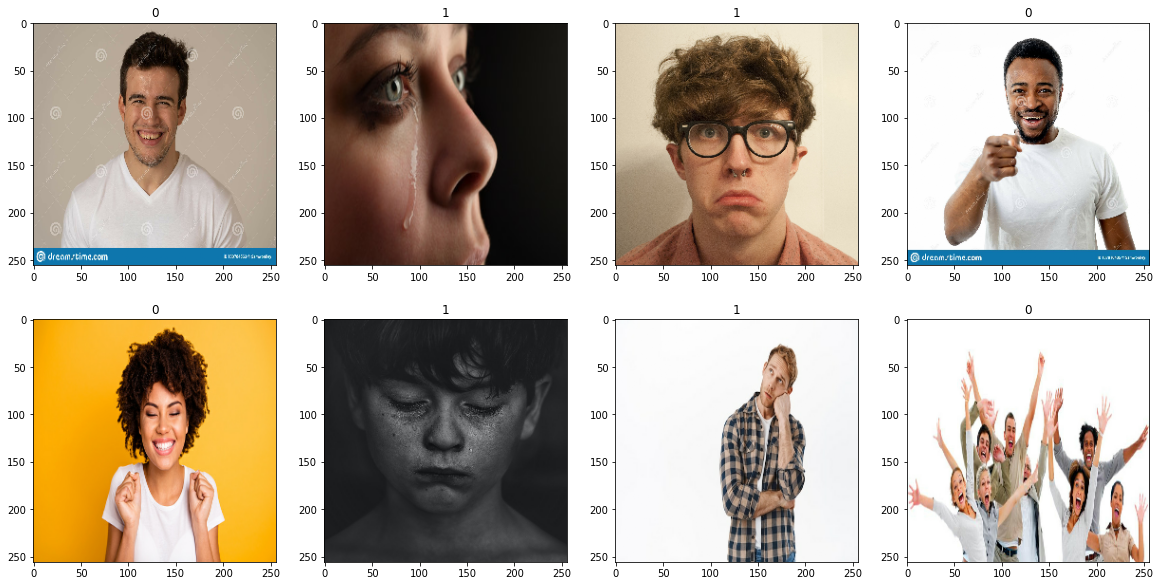

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
indx = 0
for i in range(0, 2):
  for j in range(0, 4):
    img = scaled_batch[0][indx]
    # VALUE IS FLOAT BW 0 AND 1 HENCE ASTYPE(INT) NOT NEEDED
    ax[i][j].imshow(img)
    ax[i][j].title.set_text(scaled_batch[1][indx])
    indx+=1
  # 1 - SAD
  # 0 - HAPPY

In [ ]:
# SPLIT DATA INTO TRAINING, VALIDATION, TESTING DATASETS
# TRAINING AND VALIDATION WILL BE USED DURING THE TRAINING PART(FIT FUNCTION)
num_of_batches = len(data)
num_of_batches

12

In [ ]:
# SIZES OF SETS
train_s = int(num_of_batches*0.7)
val_s = int(num_of_batches*0.2)
test_s = int(num_of_batches*0.1)+1
print(train_s, val_s, test_s)

8 2 2


In [ ]:
# ACTUAL SETS
train = data.take(train_s)
val = data.skip(train_s).take(val_s)
test = data.skip(train_s+val_s).take(test_s)

In [ ]:
# IMPORTS
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# CREATE MODEL
model = Sequential()

In [ ]:
# ADD LAYERS
model.add(Conv2D(16, (3, 3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

# NEED TO FLATTEN BEFORE DENSE
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # we want 0 or 1

In [ ]:
# COMPILE
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 32)      

TRAIN

In [ ]:
# LOG FOLDER
LOG_DIR = os.path.join("drive", "MyDrive", "Colab Notebooks", "Happy Sad Image Classifier","logs")

In [ ]:
callback = tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR)

In [ ]:
# TRAINING
# hist = model.fit(train, epochs=20, validation_data=val, callbacks=[callback])

Epoch 1/20
8/8 [==============================] - 29s 3s/step - loss: 181.9722 - accuracy: 0.4883 - val_loss: 31.9322 - val_accuracy: 0.5781
Epoch 2/20
8/8 [==============================] - 23s 3s/step - loss: 10.8753 - accuracy: 0.5039 - val_loss: 0.7690 - val_accuracy: 0.7031
Epoch 3/20
8/8 [==============================] - 27s 3s/step - loss: 0.7401 - accuracy: 0.6602 - val_loss: 0.5315 - val_accuracy: 0.7188
Epoch 4/20
8/8 [==============================] - 27s 3s/step - loss: 0.4647 - accuracy: 0.7930 - val_loss: 0.4333 - val_accuracy: 0.8438
Epoch 5/20
8/8 [==============================] - 27s 3s/step - loss: 0.3532 - accuracy: 0.8672 - val_loss: 0.2550 - val_accuracy: 0.9531
Epoch 6/20
8/8 [==============================] - 27s 3s/step - loss: 0.2778 - accuracy: 0.9297 - val_loss: 0.1426 - val_accuracy: 0.9219
Epoch 7/20
8/8 [==============================] - 27s 3s/step - loss: 0.1676 - accuracy: 0.9531 - val_loss: 0.0689 - val_accuracy: 0.9688
Epoch 8/20
8/8 [==============

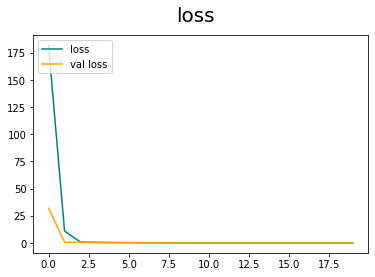

In [ ]:
# PLOT LOSSES
fig = plt.figure()
plt.plot(hist.history['loss'],color="teal", label="loss")
plt.plot(hist.history['val_loss'],color="orange", label="val loss")
plt.suptitle("loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

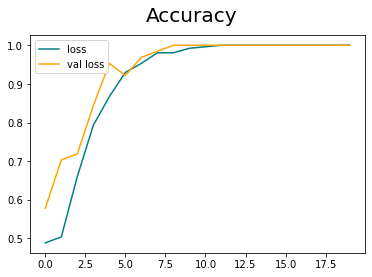

In [ ]:
# PLOT ACCURACY
fig = plt.figure()
plt.plot(hist.history['accuracy'],color="teal", label="loss")
plt.plot(hist.history['val_accuracy'],color="orange", label="val loss")
plt.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# EVALUATION IMPORTS
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
len(test)

2

In [ ]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 468ms/step


In [ ]:
print("Precision: ", precision.result().numpy())
print("recall: ", recall.result().numpy())
print("accuracy: ", accuracy.result().numpy())

Precision:  1.0
recall:  1.0
accuracy:  1.0


In [ ]:
# TESTING ON DATA FROM THE WILD
HOME = os.path.join("drive", "MyDrive", "Colab Notebooks", "Happy Sad Image Classifier", "test")

In [ ]:
# GET A TEST IMAGE
test_img_read = cv2.imread(os.path.join(HOME, "happytest6.jpg"))
rs_sc_test_img_read = tf.image.resize(test_img_read, (256, 256))/255
rs_sc_test_img_read.shape

TensorShape([256, 256, 3])

In [ ]:
rs_sc_test_img_read = np.array(rs_sc_test_img_read)

In [ ]:
rs_sc_test_img_read.max()

1.0

In [ ]:
type(rs_sc_test_img_read)

numpy.ndarray

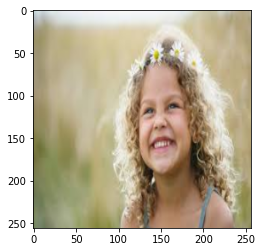

In [ ]:
plt.imshow(cv2.cvtColor(rs_sc_test_img_read, cv2.COLOR_BGR2RGB))

In [ ]:
np.expand_dims(rs_sc_test_img_read, 0).shape

(1, 256, 256, 3)

In [ ]:
p = model.predict(np.expand_dims(rs_sc_test_img_read, 0))
if(p<0.5):
  print("happy")
else:
  print("sad")

1/1 [==============================] - 0s 37ms/step
sad


In [ ]:
# LETS PREDICT TEST
predictions = model.predict(X)
predictions

1/1 [==============================] - 1s 843ms/step


array([[9.9991322e-01],
       [9.9998522e-01],
       [9.9999768e-01],
       [1.8267593e-10],
       [1.6831384e-08],
       [1.0145150e-06],
       [1.0000000e+00],
       [9.9989027e-01],
       [2.4342777e-08],
       [1.5311571e-06],
       [1.0000000e+00],
       [1.8866584e-12],
       [9.9996263e-01],
       [2.9178282e-10],
       [7.4818327e-06],
       [9.9999982e-01],
       [5.9602479e-07],
       [2.3012122e-07],
       [1.0000000e+00],
       [9.9992651e-01],
       [9.9999082e-01],
       [4.3154095e-08],
       [6.4324033e-28],
       [5.2232646e-10],
       [9.2713176e-10],
       [2.5263129e-09],
       [9.9999982e-01],
       [9.9999595e-01],
       [5.8540313e-06],
       [9.9985802e-01],
       [1.6776305e-05]], dtype=float32)

In [ ]:
predictions = predictions.reshape(31)
rounded_predictions = [round(i) for i in predictions]
rounded_predictions

[1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0]

In [ ]:
y

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y, rounded_predictions)

array([[17,  0],
       [ 0, 14]])